In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [13]:
h = unp.uarray([920, 930, 938.3, 943.1], 0.1)  # mm
t = unp.uarray([391.62, 279.85, 188.29, 126.91], 0.1)  # s
N = unp.uarray([10006, 10010, 10002, 10015], 1000)  # compte neutrons dans l'intervalle

C = N/t  # comptage
Cinv = 1/C

print(C)
print(Cinv)

[25.550278331035187+/-2.5535040704721075
 35.7691620510988+/-3.573365721437582
 53.12018694566892+/-5.311031433808372
 78.91419115908911+/-7.879845061563963]
[0.03913851688986608+/-0.00391151755357278
 0.027957042957042957+/-0.0027929292509771397
 0.018825234953009397+/-0.0018821736204829532
 0.012671992011982028+/-0.0012653406467094445]


# Graphique

955.0030032936677 944.0692302485078 998.6839086004846 10.93377304515991 43.68090530681695


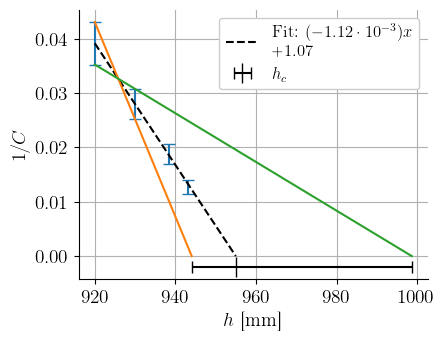

955.4104615910624 948.4852912884062 976.864698818371 6.92517030265617 21.45423722730868


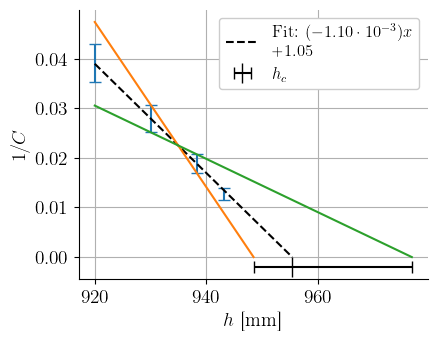

952.9851227296672 948.9868246237972 965.3572307820332 3.998298105869935 12.372108052366002


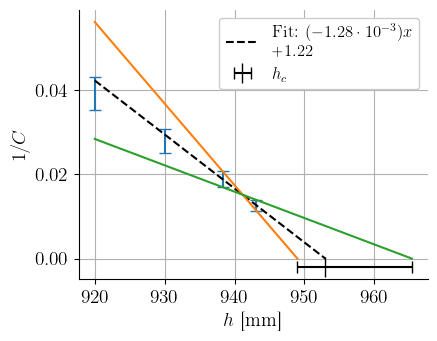

In [14]:
hc_est = np.zeros((len(h)-1, 3))
for i in range(len(h) - 1):  # basically pairwise
    coefs1 = np.polyfit(nom_vals(h[i:i+2]), nom_vals(Cinv[i:i+2]), 1)
    hc_avg = -coefs1[1]/coefs1[0]

    coefs2 = np.polyfit(nom_vals(h[i:i+2]), [Cinv[i].n + Cinv[i].s, Cinv[i+1].n - Cinv[i+1].s], 1)
    hc_low = -coefs2[1]/coefs2[0]

    coefs3 = np.polyfit(nom_vals(h[i:i+2]), [Cinv[i].n - Cinv[i].s, Cinv[i+1].n + Cinv[i+1].s], 1)
    hc_high = -coefs3[1]/coefs3[0]

    print(hc_avg, hc_low, hc_high, abs(hc_avg - hc_low), abs(hc_avg - hc_high))
    hc_est[i] = (hc_avg, hc_low, hc_high)

    # fuck it show it all
    plt.errorbar(nom_vals(h), nom_vals(Cinv), yerr=std_devs(Cinv), linestyle='none')

    x_avg = np.linspace(920, hc_avg)
    plt.plot(x_avg, np.poly1d(coefs1)(x_avg), '--', color='k', label=f"Fit: $({coefs1[0]*1e3:.2f} \\cdot 10^{{-3}}) x$\n$+ {coefs1[1]:.2f}$")
    x_low = np.linspace(920, hc_low)
    plt.plot(x_low, np.poly1d(coefs2)(x_low))
    x_high = np.linspace(920, hc_high)
    plt.plot(x_high, np.poly1d(coefs3)(x_high))
    
    plt.errorbar([hc_avg], [-2e-3], xerr=[[hc_avg-hc_low], [hc_high-hc_avg]], color='k', fmt='|', label='$h_c$')

    plt.xlabel(r'$h$ [mm]')
    plt.ylabel(r'$1/C$')
    plt.legend()
    plt.grid()

    plt.savefig(f'../figures/h_C_pair{i+1}{i+2}.pdf')
    plt.show()

# trouvé: hc = 952.2
# aussi retrouvé nice

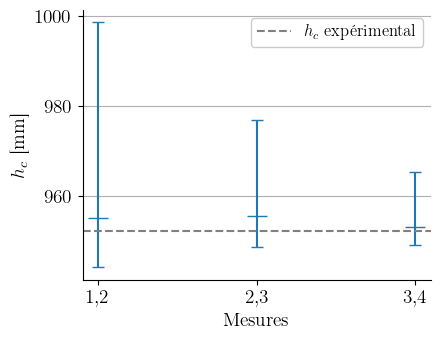

In [15]:
plt.errorbar(['1,2', '2,3', '3,4'], hc_est[:,0], yerr=np.abs(hc_est[:,1:].T - hc_est[:,0]), fmt='_')
plt.axhline(952.2, linestyle='--', label='$h_c$ expérimental')

plt.xlabel(r'Mesures')
plt.ylabel(r'$h_c$ [mm]')
plt.legend()
plt.grid(axis='y')
# plt.ylim(951, 957)
plt.savefig('../figures/hc_results_C.pdf')

In [16]:
', '.join(map(str, unp.uarray(hc_est[:,0], np.max(np.abs(hc_est[:,1:].T - hc_est[:,0]), axis=0))))

'(9.6+/-0.4)e+02, 955+/-21, 953+/-12'

# Des feurs

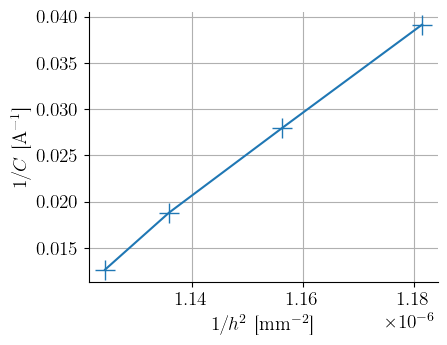

In [6]:
plt.plot(1/(nom_vals(h)**2), nom_vals(Cinv), marker='+')
# plt.plot(nom_vals(h), nom_vals(Cinv), marker='+')


plt.xlabel(r'$1/h^2$ [mm$^{-2}$]')
plt.ylabel(r'$1/C$ [\si{\per\ampere}]')
# plt.legend()
plt.grid()